In [1]:
!!pip install sqlalchemy
!pip install pymysql

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot

In [3]:
from sqlalchemy import create_engine
import pandas as pd

In [4]:
db_host='54.255.64.49:3306'
username='dm_team2'
user_pass='DM!$Team&27@9!20!'
db_name='project_sales'

In [5]:
conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
conn.table_names()

['data']

In [6]:
query = "select * from data"
orders = pd.read_sql(query,conn)
print(orders.shape)
orders

(7422, 9)


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [7]:
orders.to_csv('C:\\Users\\PRABHATI\\Sales_data.csv')

In [8]:
# Retreiving the Data from CSV-File

In [9]:
#import pandas as pd
data=pd.read_csv('Sales_data.csv')
data.head()

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


###### Getting overview of dataset

In [10]:
data.describe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7422 non-null   int64  
 1   Created        7422 non-null   object 
 2   Product_ID     7364 non-null   float64
 3   Source         7405 non-null   object 
 4   Mobile         5612 non-null   object 
 5   EMAIL          7422 non-null   object 
 6   Sales_Agent    7399 non-null   object 
 7   Location       7364 non-null   object 
 8   Delivery_Mode  7422 non-null   object 
 9   Status         7422 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 580.0+ KB


In [11]:
print("Shape :",data.shape)
print("Rows : ",data.shape[0])
print("Columns : ",data.shape[1])
print("\nFeatures : \n" ,data.columns.tolist())
print("\n Missing Values : ",data.isnull().sum().values.sum())
print("\nUnique Values : \n" ,data.nunique())

Shape : (7422, 10)
Rows :  7422
Columns :  10

Features : 
 ['Unnamed: 0', 'Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']

 Missing Values :  1966

Unique Values : 
 Unnamed: 0       7422
Created          6752
Product_ID         29
Source             25
Mobile            486
EMAIL             883
Sales_Agent        12
Location           17
Delivery_Mode       5
Status             11
dtype: int64


### EDA

In [12]:
data.dtypes

Unnamed: 0         int64
Created           object
Product_ID       float64
Source            object
Mobile            object
EMAIL             object
Sales_Agent       object
Location          object
Delivery_Mode     object
Status            object
dtype: object

In [13]:
data1=data.drop(columns=["Mobile","EMAIL","Created"])

In [14]:
data1.shape

(7422, 7)

In [15]:
data1.head()

,Unnamed: 0,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


In [16]:
# Using Counter to count the key value pairs inside the dictionary for each feature

In [17]:
Counter(data1.Location)

Counter({nan: 58,
         'Bangalore': 2084,
         'Other Locations': 2500,
         'UAE': 79,
         'Trivandrum': 58,
         'Hyderabad': 528,
         'Chennai': 909,
         'UK': 41,
         'USA': 45,
         'Delhi': 471,
         'Mumbai': 402,
         'Kolkata': 55,
         'Singapore': 17,
         'Pune': 142,
         'AUSTRALIA': 25,
         'EUROPE': 3,
         'Malaysia': 4,
         'Howrah': 1})

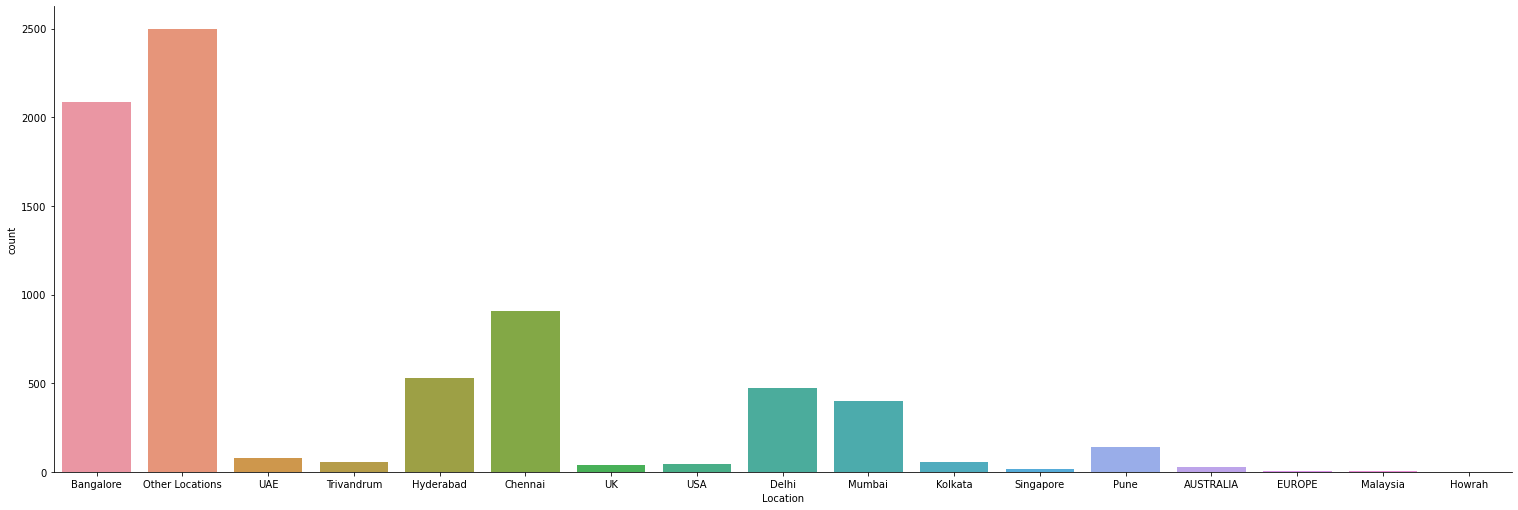

In [18]:
sns.catplot(x='Location',data=data,kind='count',height=7,aspect=3)

In [19]:
Counter(data1.Source)

Counter({'Website': 1594,
         nan: 17,
         'Live Chat-Google Organic': 274,
         'Call': 2547,
         'Live Chat-Direct': 1834,
         'By Recommendation': 32,
         'Customer Referral': 180,
         'Live Chat-Blog': 237,
         'Live Chat -PPC': 249,
         'Live Chat-Google Ads': 21,
         'Live Chat-Adwords Remarketing': 7,
         'E-Mail Message': 1,
         'Existing Client': 51,
         'Live Chat-CPC': 50,
         'Existing Customer': 22,
         'Live Chat-Quora': 2,
         'US Website': 137,
         'Just Dial': 56,
         'Campaign': 19,
         'Other': 2,
         'E-mail Campaign': 12,
         'CRM form': 23,
         'SMS Campaign': 2,
         'Personal Contact': 50,
         'Live Chat-Youtube': 2,
         'Live Chat-Justdial': 1})

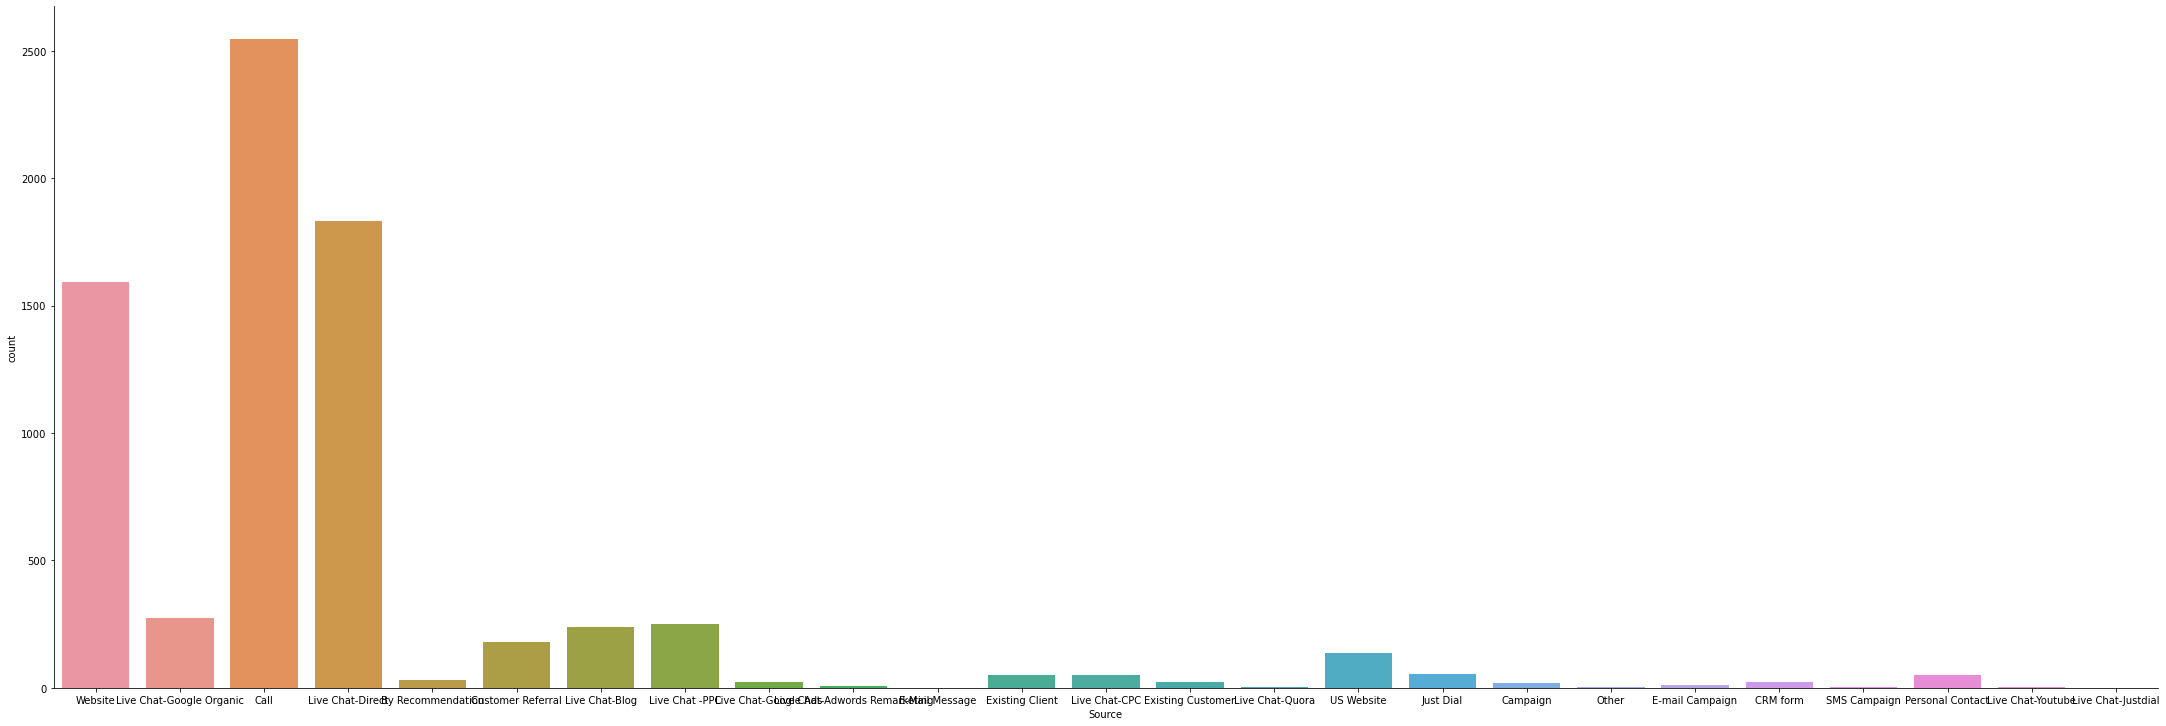

In [20]:
sns.catplot(x='Source',data=data1,kind='count',height=10,aspect=3)

In [21]:
Counter(data1.Sales_Agent)

Counter({'Sales-Agent-11': 1420,
         'Sales-Agent-10': 49,
         'Sales-Agent-3': 781,
         'Sales-Agent-4': 1500,
         'Sales-Agent-9': 879,
         'Sales-Agent-7': 736,
         nan: 23,
         'Sales-Agent-8': 68,
         'Sales-Agent-5': 1190,
         'Sales-Agent-2': 389,
         'Sales-Agent-12': 269,
         'Sales-Agent-1': 4,
         'Sales-Agent-6': 114})

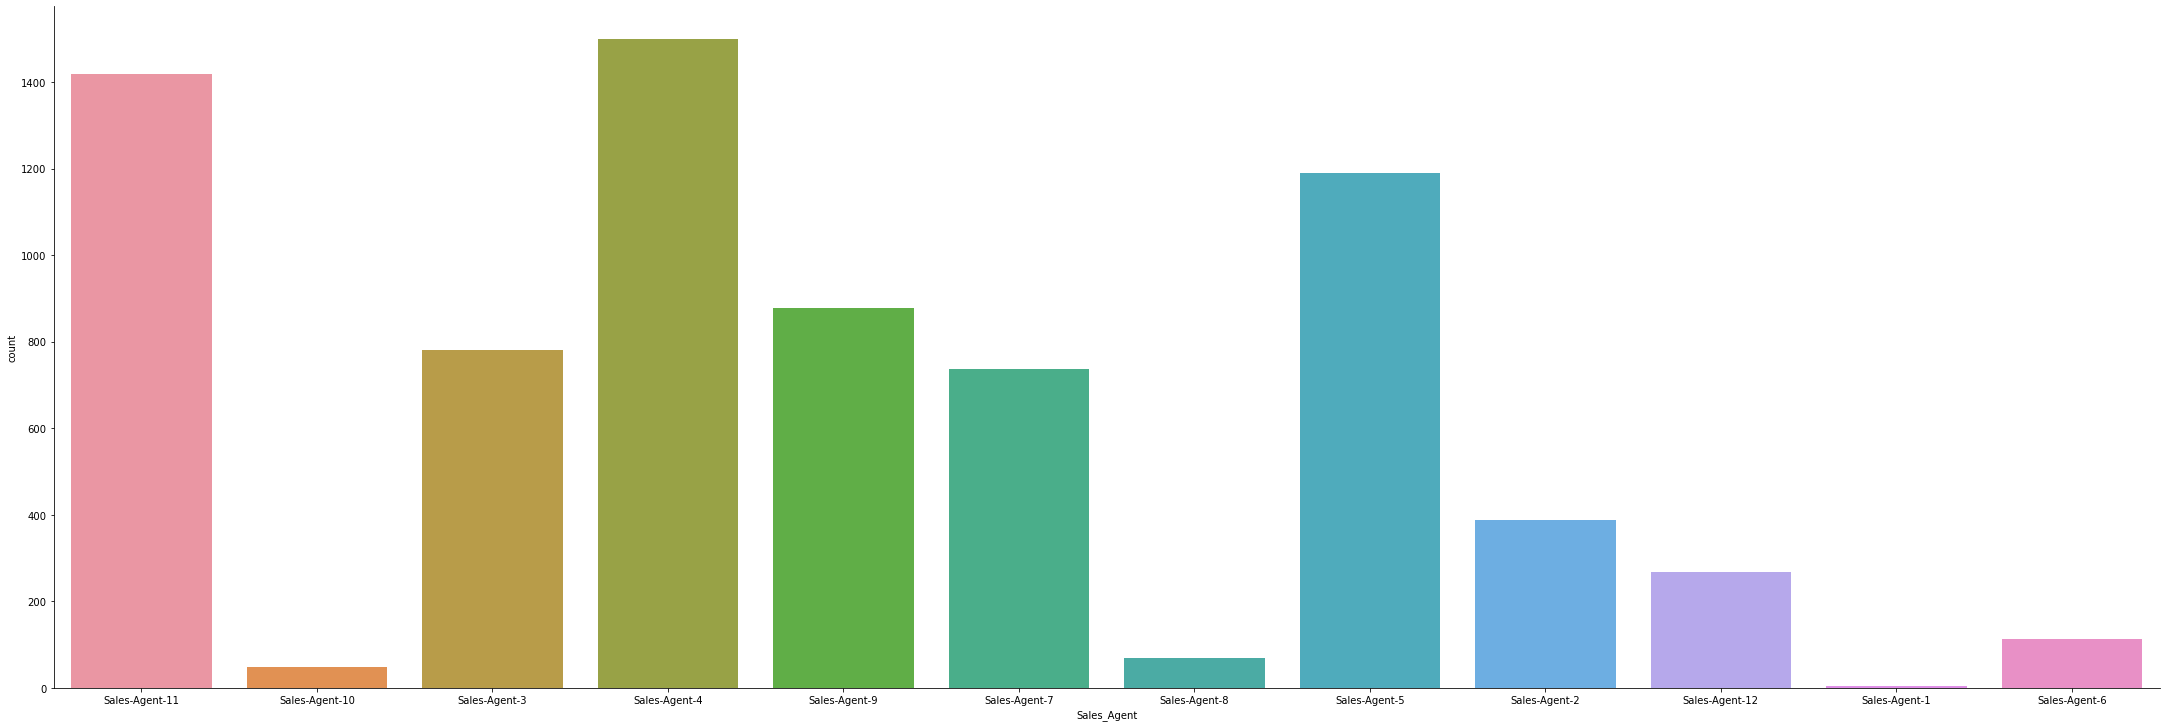

In [22]:
sns.catplot(x='Sales_Agent',data=data1,kind='count',height=10,aspect=3)

In [23]:
Counter(data1.Status)

Counter({'Open': 82,
         'Potential': 708,
         'In Progress Positive': 643,
         'Not Responding': 1129,
         'Just Enquiry': 760,
         'Junk Lead': 1536,
         'CONVERTED': 834,
         'In Progress Negative': 626,
         'LOST': 440,
         'Long Term': 646,
         'converted': 18})

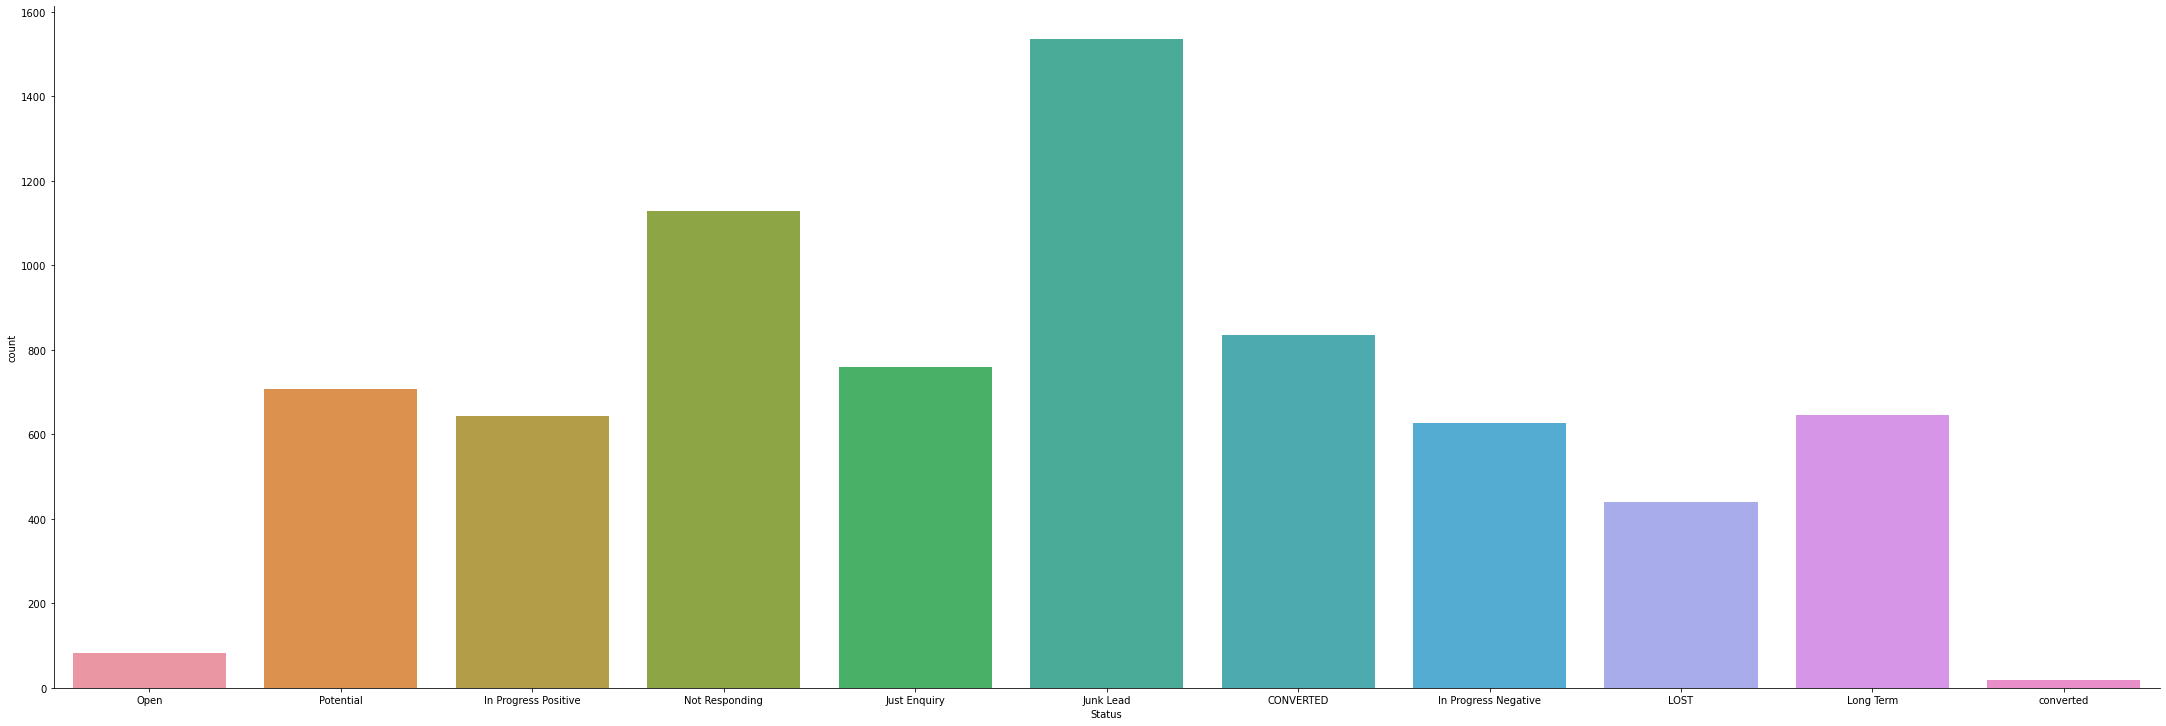

In [24]:
sns.catplot(x='Status',data=data1,kind='count',height=10,aspect=3)

In [25]:
Counter(data.Product_ID)

Counter({nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         9.0: 992,
         19.0: 1189,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         18.0: 1711,
         15.0: 1518,
         27.0: 739,
         5.0: 487,
         2.0: 38,
         3.0: 7,
         25.0: 90,
         10.0: 168,
         20.0: 102,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         11.0: 12,
         21.0: 66,
         1.0: 105,
         12.0: 36,
         13.0: 5,
         17.0: 7,
         24.0: 3,
         26.0: 31,
         16.0: 3,
         23.0: 2,
     

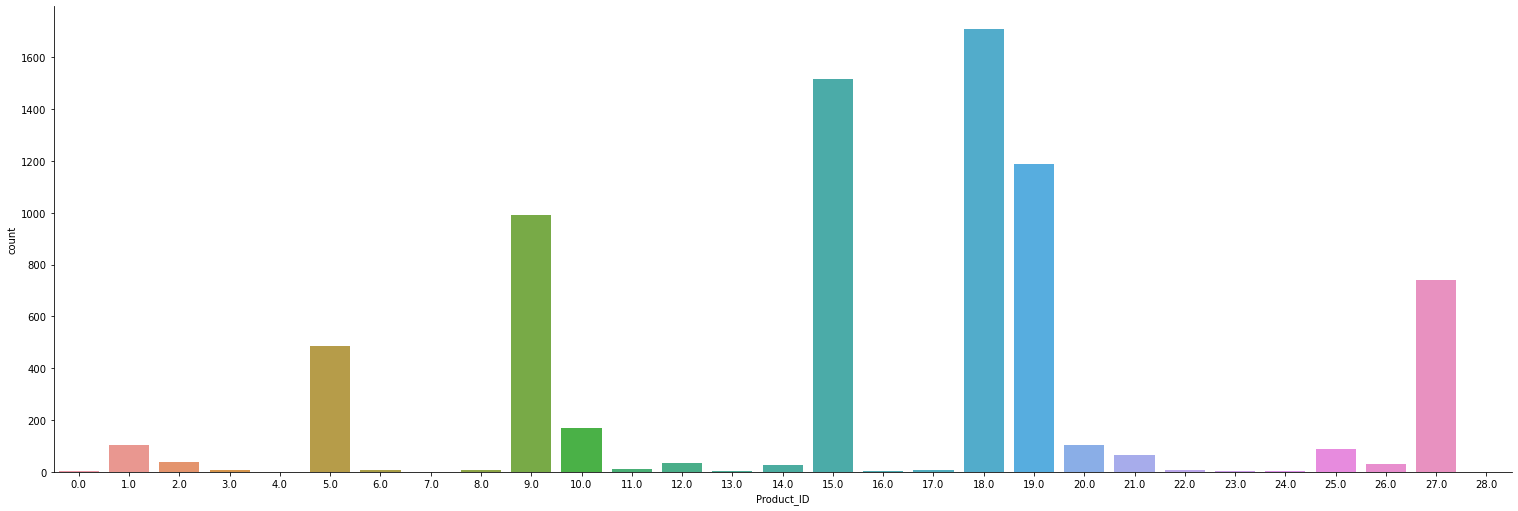

In [26]:
sns.catplot(x='Product_ID',data=data1,kind='count',height=7,aspect=3)

In [27]:
Counter(data1.Delivery_Mode)

Counter({'Mode-5': 2975,
         'Mode-1': 2627,
         'Mode-3': 1688,
         'Mode-2': 11,
         'Mode-4': 121})

In [28]:
import seaborn as sb

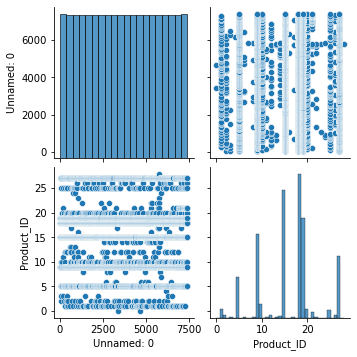

In [29]:
sb.pairplot(data1)

###### Use this technique to analyse each categorical predictor with outcome variable

Analyse the Product_ID with Outcome Variable

Status      CONVERTED  In Progress Negative  In Progress Positive  Junk Lead  \
Product_ID                                                                     
0.0            0.0000                0.0000                0.0000     0.0000   
1.0            0.0000                0.1358                0.1086     0.2988   
2.0            0.0136                0.0407                0.0407     0.0951   
3.0            0.0000                0.0272                0.0272     0.0000   
4.0            0.0000                0.0000                0.0000     0.0000   
5.0            0.6926                0.7333                0.4481     1.2765   
6.0            0.0000                0.0000                0.0136     0.0136   
7.0            0.0000                0.0000                0.0000     0.0136   
8.0            0.0000                0.0136                0.0000     0.0272   
9.0            2.4579                1.2765                1.5481     1.9011   
10.0           0.5024                0.2

<AxesSubplot:title={'center':'Product ID Vs Lead Quality: Calculated as % Overall'}, ylabel='Product_ID'>

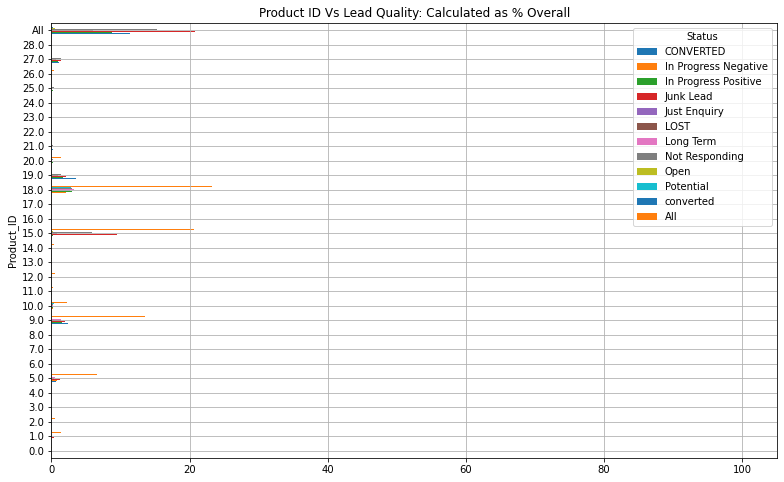

In [30]:
rcParams['figure.figsize']=13,8
Crosstab_Cat=pd.crosstab([data1.Product_ID],data1.Status,normalize='all',margins=True).round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True,title="Product ID Vs Lead Quality: Calculated as % Overall")

Analyze the Source with Outcome Variable

Status                         CONVERTED  In Progress Negative  \
Source                                                           
By Recommendation                 0.2431                0.0000   
CRM form                          0.0405                0.0675   
Call                              3.2411                2.7009   
Campaign                          0.0540                0.0000   
Customer Referral                 1.5935                0.0540   
E-Mail Message                    0.0000                0.0000   
E-mail Campaign                   0.0540                0.0270   
Existing Client                   0.4727                0.0000   
Existing Customer                 0.1756                0.0135   
Just Dial                         0.0135                0.1215   
Live Chat -PPC                    0.1485                0.2971   
Live Chat-Adwords Remarketing     0.0000                0.0000   
Live Chat-Blog                    0.1485                0.3646   
Live Chat-

<AxesSubplot:title={'center':'Sources Vs Lead Quality: Calculated as % Overall re'}, ylabel='Source'>

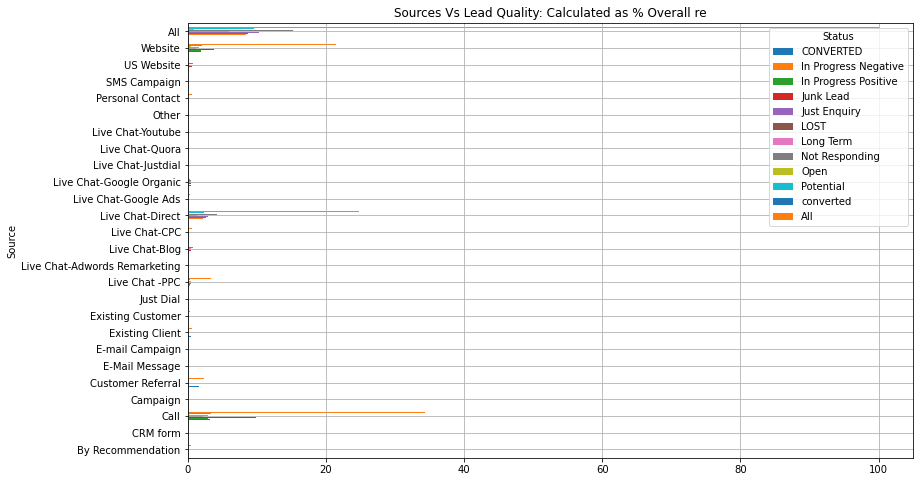

In [31]:
rcParams['figure.figsize']=13,8
Crosstab_Cat=pd.crosstab([data1.Source],data1.Status,normalize='all',margins=True).round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True,title="Sources Vs Lead Quality: Calculated as % Overall re")


Analyze Sales Agent with Outcome Variable

In [32]:
rcParams['figure.figsize']=13,8
Crosstab_Cat=pd.crosstab([data1.Sales_Agent],data1.Status,normalize='all',margins=True).round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', stacked=False, grid=True, title="Sales Agent Vs Lead Quality:Calculated as % Overall..)
######

SyntaxError: EOL while scanning string literal (<ipython-input-32-b6fada11c493>, line 4)

Analyse Delivery Mode with Outcome Variable

In [ ]:
rcParams['figure.figsize']=13,8
Crosstab_Cat=pd.crosstab([data1.Delivery_Mode],data1.Status, normalize='all',margins=True).round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh',stacked=False, grid=True, title="Delivery Mode Vs Lead Quality: Calculated as % Over...")

Analyse Location with Outcome Variable

In [ ]:
rcParams['figure.figsize']=13,8
Crosstab_Cat=pd.crosstab([data1.Location], data1.Status,normalize='all', margin=True).round(6)*100
print(Crosstab_Cat)
Crosstab_Cat.plot(kind='barh', Stacked=False, grid=True,title="Location Vs Lead Quality: Calculated as % Overall re")

###### Grouping columns into Categorical and Continuous column list

In [ ]:
# Grouping columns into Categorical and Continuous column list
Catcol_list=['Source','Sales_Agent','Location','Delivery_Mode','Status']
Concol_list=['Product_ID']

###### Checking the distribution of data for continuous variables

In [33]:
for i in Concol_list:
    data1[i]=data1[i].astype('float').astype(int)
    data1.dtypes

NameError: name 'Concol_list' is not defined

In [ ]:
data1[Concol_list].hist(figsize=(10,10))

###### Checking the distribution of data for continuous variables

In [34]:
#Plot categorical data using Seaborn's facegrid and Panda's melt function
fig, ax=plt.subplots(1, len(Catcol_list) , figsize=(15,5))
for i, j in enumerate(data1[Catcol_list]):
    data1[j].value_counts().plot("bar", ax=ax[i]).set_title(j)
    
fig.show()

NameError: name 'Catcol_list' is not defined

###### Cleaning the Data

In [35]:
# Checking for outliers

<AxesSubplot:>

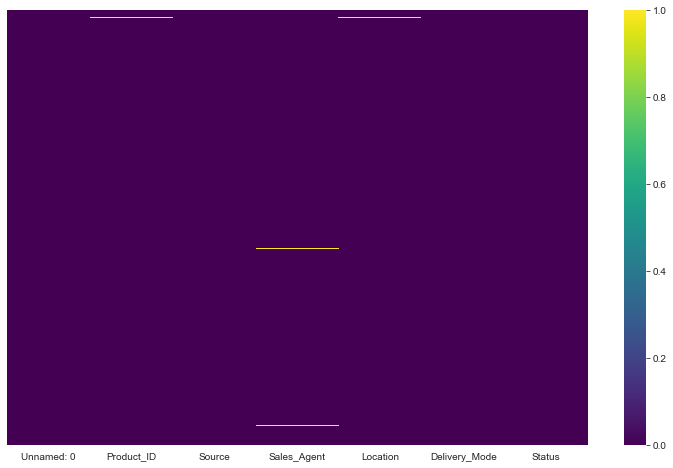

In [36]:
sns.set_style('whitegrid')
sns.heatmap(data1.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [37]:
# NULL value treatment

In [38]:
Sales_data = data1.fillna(method = 'bfill')

In [39]:
Sales_data.head()

,Unnamed: 0,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,9.0,Website,Sales-Agent-11,Bangalore,Mode-5,Open
1,1,9.0,Website,Sales-Agent-10,Bangalore,Mode-5,Open
2,2,9.0,Website,Sales-Agent-10,Bangalore,Mode-5,Open
3,3,9.0,Website,Sales-Agent-10,Bangalore,Mode-5,Open
4,4,9.0,Website,Sales-Agent-10,Bangalore,Mode-5,Open


In [40]:
Sales_data.isna().sum().to_frame().T

,Unnamed: 0,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,0,0,0,0,0,0


<AxesSubplot:>

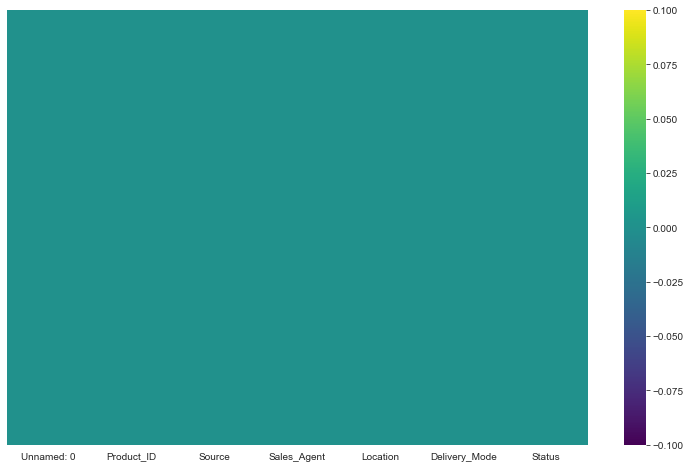

In [41]:
sns.set_style('whitegrid')
sns.heatmap(Sales_data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [42]:
pd.get_dummies(data.Status,drop_first=True)

,In Progress Negative,In Progress Positive,Junk Lead,Just Enquiry,LOST,Long Term,Not Responding,Open,Potential,converted
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7417,0,0,0,0,1,0,0,0,0,0
7418,0,0,0,0,1,0,0,0,0,0
7419,0,0,0,0,0,0,1,0,0,0
7420,0,0,0,1,0,0,0,0,0,0


In [43]:
# Convert the Status field values into High Potential and Low Potential¶

In [44]:
Sales_data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'High Potential',inplace=True)
Sales_data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Low Potential',inplace=True)

In [45]:
Sales_data.head()

,Unnamed: 0,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,9.0,Website,Sales-Agent-11,Bangalore,Mode-5,High Potential
1,1,9.0,Website,Sales-Agent-10,Bangalore,Mode-5,High Potential
2,2,9.0,Website,Sales-Agent-10,Bangalore,Mode-5,High Potential
3,3,9.0,Website,Sales-Agent-10,Bangalore,Mode-5,High Potential
4,4,9.0,Website,Sales-Agent-10,Bangalore,Mode-5,High Potential


###### Correlation Matrix

In [46]:
corr=data.corr()
corr

,Unnamed: 0,Product_ID
Unnamed: 0,1.000000,-0.013445
Product_ID,-0.013445,1.000000


<AxesSubplot:>

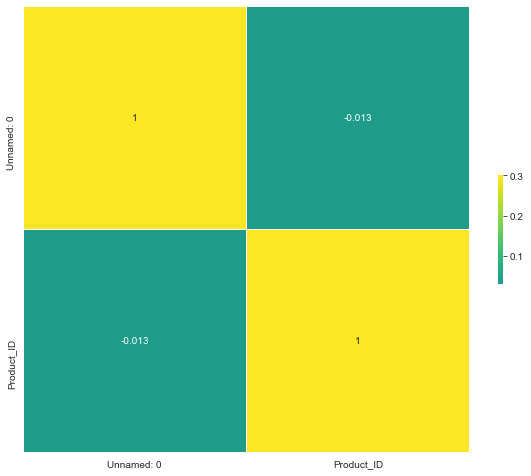

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='viridis',vmax=.3,vmin=0.03 ,center=0,square=True, linewidths=.2, cbar_kws={"shrink": .2}, annot=True)

##### Using Label Encoder

In [48]:
# Grouping columns into Categorical and Continuous column list
Catcol_list=['Source','Sales_Agent','Location','Delivery_Mode']
Concol_list=['Product_ID']
target_class=['Status']

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in Catcol_list+target_class:
    Sales_data[i]=labelencoder.fit_transform(Sales_data[i])
Sales_data.head()

,Unnamed: 0,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,9.0,24,2,1,4,0
1,1,9.0,24,1,1,4,0
2,2,9.0,24,1,1,4,0
3,3,9.0,24,1,1,4,0
4,4,9.0,24,1,1,4,0


### Machine Learning model to predict the Lead Category(High Potential, Low Potential)

In [50]:
# Define X and y variables

In [51]:
X=Sales_data.iloc[:,:-1]
y=Sales_data.Status

In [52]:
X.head()

,Unnamed: 0,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,0,9.0,24,2,1,4
1,1,9.0,24,1,1,4
2,2,9.0,24,1,1,4
3,3,9.0,24,1,1,4
4,4,9.0,24,1,1,4


In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int32

######  Use train_test split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [55]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ", X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (5566, 6)
X_test shape =  (1856, 6)
y_train shape =  (5566,)
y_test shape =  (1856,)


###### Using Standard Scaler

In [56]:

scaler = StandardScaler()

scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (5566, 6)
X_test shape =  (1856, 6)
y_train shape =  (5566,)
y_test shape =  (1856,)


###### Using SMOTE technique

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
smote=SMOTE()
X_train,y_train=smote.fit_sample(X_train,y_train)

In [60]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (6708, 6)
X_test shape =  (1856, 6)
y_train shape =  (6708,)
y_test shape =  (1856,)


###### Using PCA technique

In [61]:
# Import necessary package

In [62]:
from sklearn.decomposition import PCA

In [63]:
# Define the Model

In [64]:
pca=PCA(svd_solver='auto',random_state=10)
X=pd.DataFrame(pca.fit_transform(X))
X.head()

LinAlgError: SVD did not converge

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve ,auc
from sklearn.model_selection import KFold, cross_val_score

In [66]:
# prepare models

models=[]

models.append(('LR',LogisticRegression()))
#models.append(('KNN',KNeighborsClassifier))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
models.append(('XGBoost',XGBClassifier()))
#models.append(('RF',RandomForestClassifier))

score='accuracy'
results=[]
names=[]

for n ,m in models:
    kfold=KFold(n_splits=10, random_state=10)
    
    cv_results=cross_val_score(m ,X,y,scoring=score,cv=kfold) # m :model (model ,X,y,scoring,cv)
    results.append(cv_results)
    names.append(n)
    
    msg="%s : %f (%f) " % (n,cv_results.mean(),cv_results.std())
    print(msg)

LR : 0.675562 (0.014199) 
CART : 0.645781 (0.041156) 
SVM : 0.605119 (0.060005) 
XGBoost : 0.701970 (0.033778) 
